## Installing Required Packages and Modules

In [ ]:
# Executing a bash command to install cassandra driver
!pip install cassandra-driver

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
# setting max columns as 50 to display in pandas
pd.set_option("display.max_columns",50)

## Exploratory Data Analysis (EDA)

In [4]:
# specifying client_id and client_secret to connect to cassandra database
client_id = 'GJZtsoMguQmWZOZZPPWIdeAw'
client_secret = 'yTdq.2Sf7PWG8bxd4mAClagWvZt0C9ATXv+c,.3a7tuczorvi5C0qBe,\
g0ZeZHJDfapam,t78bDOfuNL..pI,oSZiGITc9vAm6CoPJ24Oa68m2fCsCu+O3IujjDFFgI0'

In [5]:
# connecting to cassandra database
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': '/content/secure-connect-my-database.zip'
}
auth_provider = PlainTextAuthProvider(client_id, client_secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

df = pd.DataFrame(list(session.execute("select * from my_keyspace.adult_data;")))

In [6]:
# Checking different columns present
df.columns

Index(['index', 'age', 'capital_gain', 'capital_loss', 'country', 'education',
       'education_num', 'fnlwgt', 'hours_per_week', 'marital_status',
       'occupation', 'race', 'relationship', 'salary', 'sex', 'workclass'],
      dtype='object')

In [7]:
# Removing the index column
df = df.iloc[:, 1:]

In [8]:
# number of rows and columns in train and test data

print('Number of rows in data : ', df.shape[0])
print('Number of columns in data : ', df.shape[1])

Number of rows in data :  32561
Number of columns in data :  15


In [9]:
### checking datatypes of different features
print('data info :')
print('-'*50)
df.info()

data info :
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   capital_gain    32561 non-null  int64 
 2   capital_loss    32561 non-null  int64 
 3   country         32561 non-null  object
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   fnlwgt          32561 non-null  int64 
 7   hours_per_week  32561 non-null  int64 
 8   marital_status  32561 non-null  object
 9   occupation      32561 non-null  object
 10  race            32561 non-null  object
 11  relationship    32561 non-null  object
 12  salary          32561 non-null  object
 13  sex             32561 non-null  object
 14  workclass       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.head()

,age,capital_gain,capital_loss,country,education,education_num,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass
0,40,0,0,United-States,Bachelors,13,289403,35,Separated,Adm-clerical,Black,Unmarried,<=50K,Male,Private
1,36,0,0,United-States,HS-grad,9,171968,40,Married-civ-spouse,Craft-repair,White,Husband,<=50K,Male,Private
2,21,0,0,United-States,HS-grad,9,34506,35,Separated,Other-service,White,Own-child,<=50K,Female,Private
3,21,0,0,?,12th,8,202570,48,Never-married,Adm-clerical,Black,Other-relative,<=50K,Male,Private
4,24,0,0,United-States,Some-college,10,117167,53,Never-married,Other-service,White,Not-in-family,<=50K,Female,Private


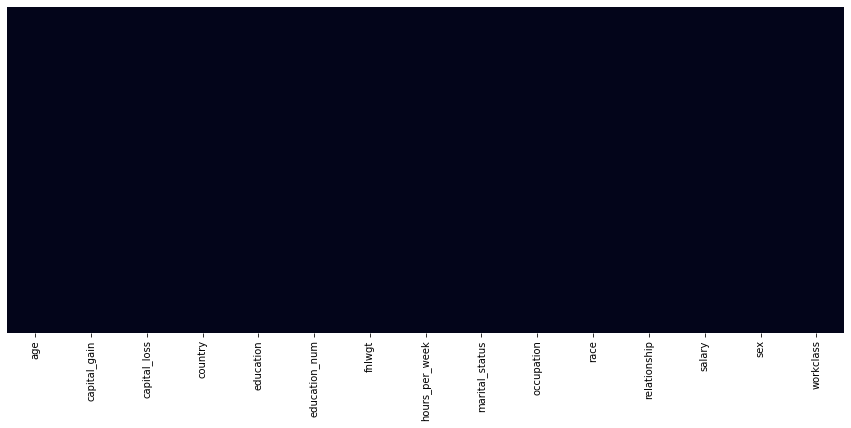

In [11]:
# checking for missing values in data

plt.figure(figsize = (15,6))
sns.heatmap(df.isnull(),yticklabels = False , cbar = False)

In [12]:
# Checking value counts of different values in percentage
df['marital_status'].value_counts(normalize=True)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital_status, dtype: float64

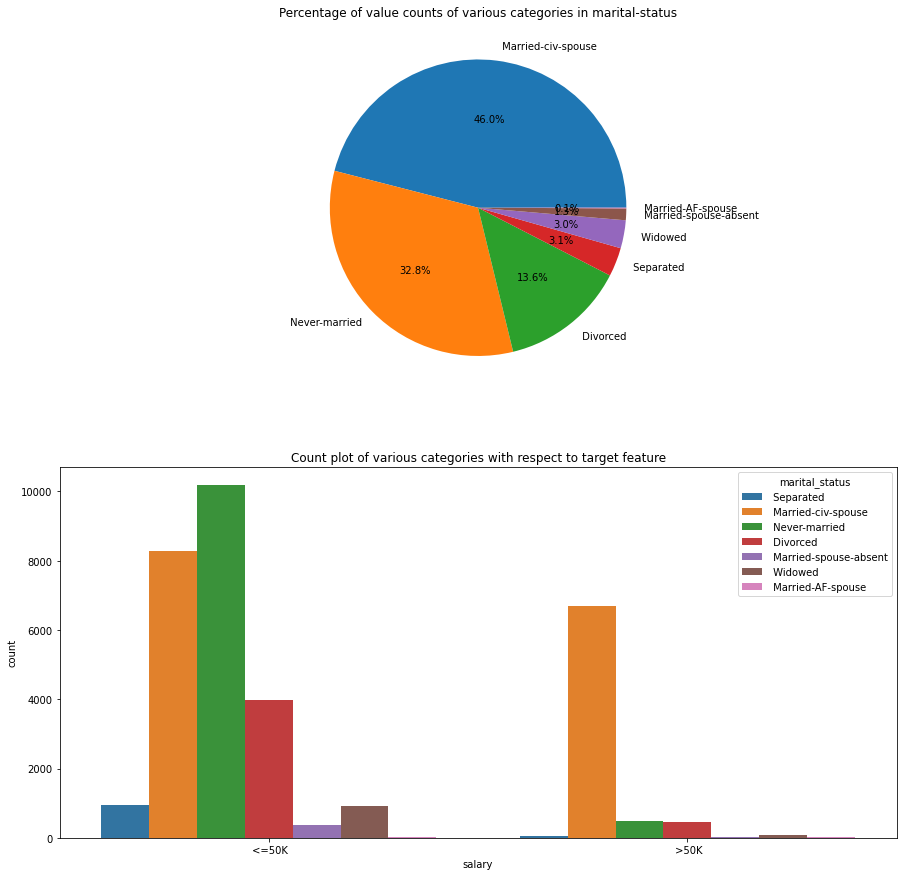

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,15))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'salary', hue = 'marital_status', data = df, ax = ax2)
ax2.set_title('Count plot of various categories with respect to target feature')
ax1.pie(x = df['marital_status'].value_counts(normalize=True), labels = df['marital_status'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in marital-status')
plt.show()

From the graphs above, we observe that the category marred-civ-spouse have a greater probability of earning greater then 50K per annum.

In [14]:
# Analyzing column marital_status
df['marital_status'].unique()

array([' Separated', ' Married-civ-spouse', ' Never-married', ' Divorced',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [15]:
# classifying various categories in marital_status columns as single or married
df.replace(to_replace=df['marital_status'].unique(),\
           value = ['single','married','single','single','single','married','single'], inplace=True)
df.head()

,age,capital_gain,capital_loss,country,education,education_num,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass
0,40,0,0,United-States,Bachelors,13,289403,35,single,Adm-clerical,Black,Unmarried,<=50K,Male,Private
1,36,0,0,United-States,HS-grad,9,171968,40,married,Craft-repair,White,Husband,<=50K,Male,Private
2,21,0,0,United-States,HS-grad,9,34506,35,single,Other-service,White,Own-child,<=50K,Female,Private
3,21,0,0,?,12th,8,202570,48,single,Adm-clerical,Black,Other-relative,<=50K,Male,Private
4,24,0,0,United-States,Some-college,10,117167,53,single,Other-service,White,Not-in-family,<=50K,Female,Private


In [16]:
# encoding 0 for single and 1 for married
df.replace(to_replace=['single', 'married'], value = [0,1], inplace = True)
df.head(2)

,age,capital_gain,capital_loss,country,education,education_num,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass
0,40,0,0,United-States,Bachelors,13,289403,35,0,Adm-clerical,Black,Unmarried,<=50K,Male,Private
1,36,0,0,United-States,HS-grad,9,171968,40,1,Craft-repair,White,Husband,<=50K,Male,Private


In [17]:
# Converting values from salary column(target feature) to binary values
# Substituting 0 where salary is <=50K and 1 where salary is more than 50K

df.replace(to_replace=[' <=50K', ' >50K'], value = [0, 1], inplace = True)
df.head()

,age,capital_gain,capital_loss,country,education,education_num,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass
0,40,0,0,United-States,Bachelors,13,289403,35,0,Adm-clerical,Black,Unmarried,0,Male,Private
1,36,0,0,United-States,HS-grad,9,171968,40,1,Craft-repair,White,Husband,0,Male,Private
2,21,0,0,United-States,HS-grad,9,34506,35,0,Other-service,White,Own-child,0,Female,Private
3,21,0,0,?,12th,8,202570,48,0,Adm-clerical,Black,Other-relative,0,Male,Private
4,24,0,0,United-States,Some-college,10,117167,53,0,Other-service,White,Not-in-family,0,Female,Private


In [18]:
# creating a new feature gain/loss

gain_or_loss = np.zeros(len(df))
gain_index = df[df['capital_gain'] != 0].index
loss_index = df[df['capital_loss'] != 0].index
for index in gain_index:
    gain_or_loss[index] = 1
for index in loss_index:
    gain_or_loss[index] = -1
    
df['gain/loss'] = gain_or_loss.astype(int)

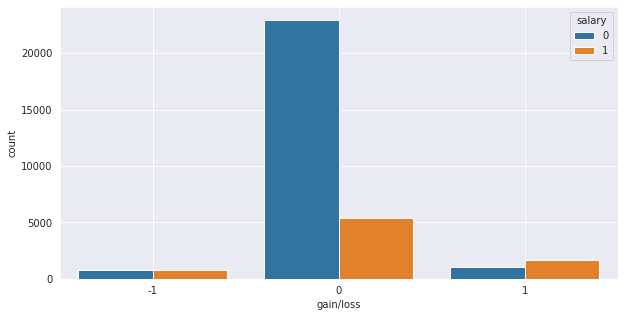

In [19]:
# Analysing salary with respect to gain/loss column
plt.figure(figsize = (10,5))
sns.set_style(style = 'darkgrid')
sns.countplot(x = 'gain/loss', hue = 'salary', data = df)
plt.grid(True)

As we can see from the other graph :
• Number of people earning more or less than 50K and are facing a loss are same
• Generally people who are in no profit-no loss condition earn less than 50K, lack of assets and capital might be the reason for this
• As, seen from the graph, people who are having capital gains tend to earn more.

--------------------------------------------------
value counts in sex column in percentage


 Male      66.920549
 Female    33.079451
Name: sex, dtype: float64

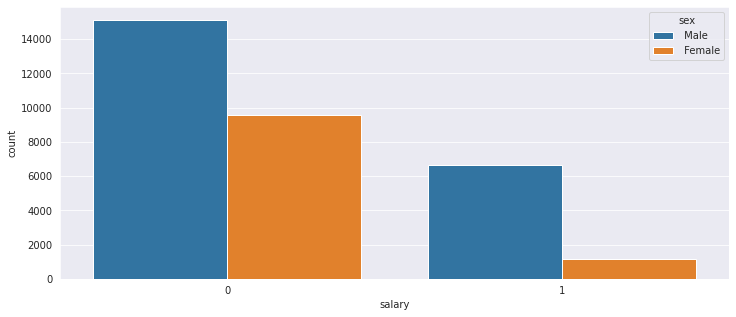

In [20]:
# Analyzing sex column

plt.figure(figsize = (12,5))
sns.countplot(x = 'salary', hue = 'sex', data = df)
print('-'*50)
print('value counts in sex column in percentage')
display(df['sex'].value_counts(normalize=True)*100)

Thus, males have a higher probability of earning more than 50K, according to the data given

In [21]:
# converting sex columns into binary values

df.replace(to_replace = [' Female', ' Male'], value = [0, 1], inplace = True)
df.head()

,age,capital_gain,capital_loss,country,education,education_num,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass,gain/loss
0,40,0,0,United-States,Bachelors,13,289403,35,0,Adm-clerical,Black,Unmarried,0,1,Private,0
1,36,0,0,United-States,HS-grad,9,171968,40,1,Craft-repair,White,Husband,0,1,Private,0
2,21,0,0,United-States,HS-grad,9,34506,35,0,Other-service,White,Own-child,0,0,Private,0
3,21,0,0,?,12th,8,202570,48,0,Adm-clerical,Black,Other-relative,0,1,Private,0
4,24,0,0,United-States,Some-college,10,117167,53,0,Other-service,White,Not-in-family,0,0,Private,0


In [22]:
# We observe that higher the degree of a person, higher is the education_num
# So we need not do any Label Encoding here, as ranks are already assigned in the desired format
# Creating a dataframe to know which rank belongs to which degree

df_education_labels = df.groupby(by = 'education').describe()['education_num']['mean'].sort_values().reset_index()
df_education_labels

,education,mean
0,Preschool,1.0
1,1st-4th,2.0
2,5th-6th,3.0
3,7th-8th,4.0
4,9th,5.0
5,10th,6.0
6,11th,7.0
7,12th,8.0
8,HS-grad,9.0
9,Some-college,10.0


In [23]:
# Naming education_num as education_rank

df.rename(columns = {'education_num': 'education_rank'}, inplace=True)
df.head()

,age,capital_gain,capital_loss,country,education,education_rank,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass,gain/loss
0,40,0,0,United-States,Bachelors,13,289403,35,0,Adm-clerical,Black,Unmarried,0,1,Private,0
1,36,0,0,United-States,HS-grad,9,171968,40,1,Craft-repair,White,Husband,0,1,Private,0
2,21,0,0,United-States,HS-grad,9,34506,35,0,Other-service,White,Own-child,0,0,Private,0
3,21,0,0,?,12th,8,202570,48,0,Adm-clerical,Black,Other-relative,0,1,Private,0
4,24,0,0,United-States,Some-college,10,117167,53,0,Other-service,White,Not-in-family,0,0,Private,0


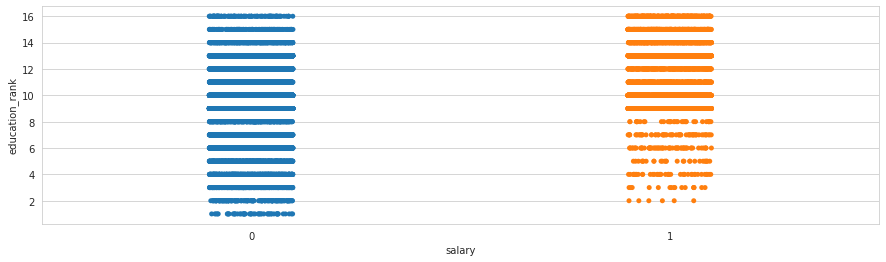

In [24]:
plt.figure(figsize = (15,4))
sns.set_style(style='whitegrid')
sns.stripplot(x = 'salary', y = 'education_rank', data = df)

So, as we can see, there are very few people who are earning more than 50K and are educated 7th-8th, this kind of maeks sense as it's pretty much difficult for one to earn this much having very less qualifications and is rarely found.

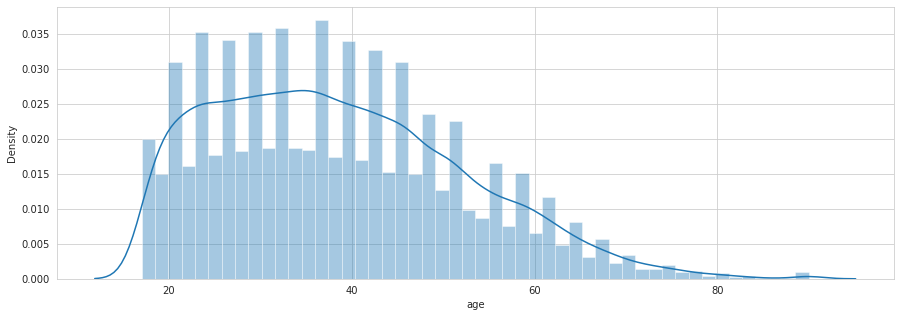

____________________________________________________________________________________________________
skewness in age column : 0.5587433694130484


In [25]:
# Doing univariate analysis on age column
plt.figure(figsize = (15,5))
sns.distplot(df['age'], kde = True)
plt.show()
print("_"*100)
print('skewness in age column :',df['age'].skew())

From the graph, it is observed that data in this column is right skewed as the skewness is found out to be positive

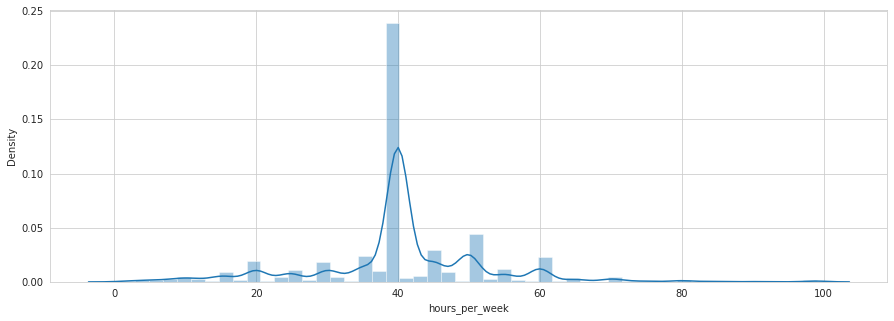

____________________________________________________________________________________________________
skewness in age column : 0.22764253680450092


In [26]:
### Doing univariate analysis on workours column
plt.figure(figsize = (15,5))
sns.distplot(df['hours_per_week'], kde = True)
plt.show()
print("_"*100)
print('skewness in age column :',df['hours_per_week'].skew())

From the above density plot, it can be clearly seen that most people work for around 40 hours per week, and there are very less people who work for more than 70 hours and less than 20 hours per week

In [27]:
# Using simple imputer to replace question marks denoting missing data in the column workclass 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
workclass_imputed = imputer.fit_transform(df[['workclass']])
df['workclass'] = workclass_imputed
df['workclass'].value_counts(normalize=True)*100

 Private             75.341666
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name: workclass, dtype: float64

In [28]:
# Naming values in workclass column as others where value count is less than 2% of total values

arr_others = df['workclass'].value_counts(normalize=True)[df['workclass'].value_counts(normalize=True)*100 < 2].index
df.replace(to_replace = arr_others, value = ['others']*len(arr_others), inplace = True)

In [29]:
# Doing one-hot encoding on workclass
workclass = pd.get_dummies(df[['workclass']], drop_first=True)

In [30]:
#Checking different encoded categories in workclass dataframe
workclass.columns

Index(['workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_others'],
      dtype='object')

In [31]:
# Renaming columns in workclass dataframe
workclass.columns = ['Local_gov','Private','Self_emp_inc','Self_emp_not_in_inc','State_gov','others']

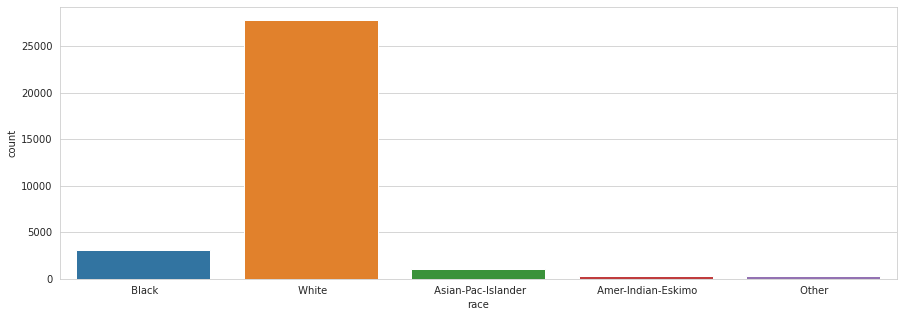

In [32]:
# checking for values in race column
plt.figure(figsize = (15,5))
sns.countplot(x = 'race', data = df)
plt.show()

As we can see that we have only 5 categories in the race column alongwith an other category, so we will do one-hot encoding in this column directly

In [33]:
# doing one hot encoding on race column
race = pd.get_dummies(df[['race']], drop_first = True)

In [34]:
# Checking for different encoded categories in race dataframe
race.columns

Index(['race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other',
       'race_ White'],
      dtype='object')

In [35]:
# Renaming columns in dataframe race
race.columns = ['Asian_Pac_Islander','Black','Other','White']

In [36]:
# working on occupation column

df['occupation'].unique()

array([' Adm-clerical', ' Craft-repair', ' Other-service',
       ' Farming-fishing', ' Sales', ' ?', ' Prof-specialty',
       ' Machine-op-inspct', ' Protective-serv', ' Transport-moving',
       ' Exec-managerial', ' Tech-support', ' Handlers-cleaners',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

In [37]:
# Substituting question marks with most frequent value in the occupation column using simple imputer

imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
occupation_imputed = imputer.fit_transform(df[['occupation']])
df['occupation'] = occupation_imputed

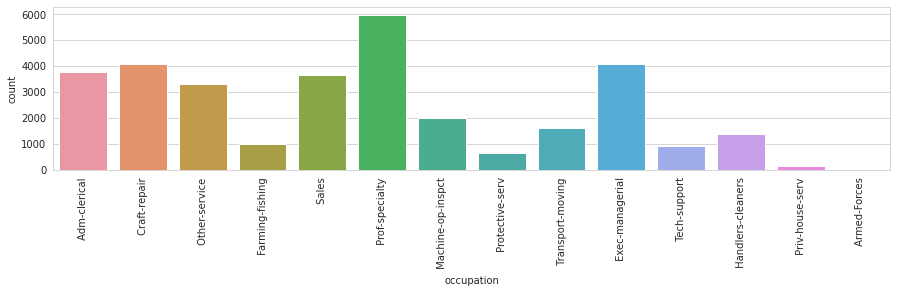

value counts in occupation column in percentage :


 Prof-specialty       18.374743
 Craft-repair         12.588680
 Exec-managerial      12.487331
 Adm-clerical         11.578268
 Sales                11.209729
 Other-service        10.119468
 Machine-op-inspct     6.148460
 Transport-moving      4.904641
 Handlers-cleaners     4.207487
 Farming-fishing       3.052732
 Tech-support          2.850035
 Protective-serv       1.993182
 Priv-house-serv       0.457603
 Armed-Forces          0.027640
Name: occupation, dtype: float64

In [38]:
plt.figure(figsize = (15,3))
plt.xticks(rotation = 90)
sns.countplot(x = 'occupation', data = df)
plt.show()
print("value counts in occupation column in percentage :")
display(df['occupation'].value_counts(normalize = True)*100)

Since, there are not much categories in the occupation column and they aren't ordinal so just doing one-hot encoding on occupation column too

In [39]:
# one-hot encoding on occupation column
occupation = pd.get_dummies(df[['occupation']], drop_first = True)
occupation.columns

Index(['occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving'],
      dtype='object')

In [40]:
occupation.columns = ['Armed_Forces','Craft_repair','Exec_managerial','Farming_fishing','Handlers_cleaners','Machine_op_inspct',\
                      'Other_service','Priv_house_serv','Prof_specialty','Protective_serv','Sales','Tech_support',\
                      'Transport_moving']

In [41]:
# displaying unique countries with value counts in percentage
df['country'].value_counts(normalize = True)*100

 United-States                 89.585701
 Mexico                         1.974755
 ?                              1.790486
 Philippines                    0.608089
 Germany                        0.420749
 Canada                         0.371610
 Puerto-Rico                    0.350112
 El-Salvador                    0.325543
 India                          0.307116
 Cuba                           0.291760
 England                        0.276404
 Jamaica                        0.248764
 South                          0.245693
 China                          0.230337
 Italy                          0.224195
 Dominican-Republic             0.214981
 Vietnam                        0.205768
 Guatemala                      0.196554
 Japan                          0.190412
 Poland                         0.184270
 Columbia                       0.181198
 Taiwan                         0.156629
 Haiti                          0.135131
 Iran                           0.132060
 Portugal       

In [42]:
# imputing most frequent value in place of question marks
imputer = SimpleImputer(missing_values=' ?', strategy = 'most_frequent')
country_imputed = imputer.fit_transform(df[['country']])
df['country'] = country_imputed

In [43]:
# naming less frequent countries as others (having value counts less than 0.3% of total values)
percentage_threshold = 0.3
arr_others = df['country'].value_counts()[df['country'].value_counts(normalize=True)*100 < percentage_threshold].index
df['country'].replace(to_replace=arr_others, value = ['others']*len(arr_others), inplace=True)

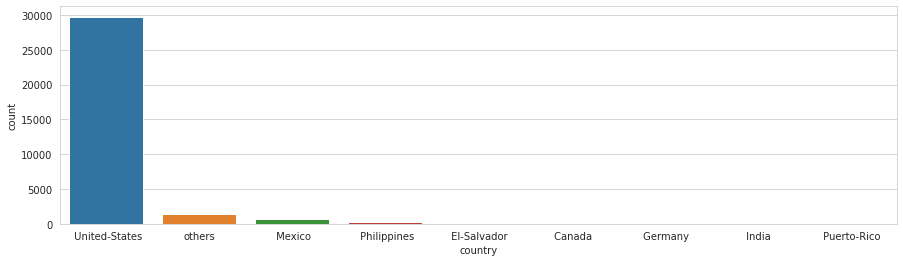

In [44]:
plt.figure(figsize = (15,4))
sns.countplot(x= 'country', data = df)

Clearly, from the graph, most of the data points that we have belong to United States in the country column

In [45]:
# Encoding countries in country column
country = pd.get_dummies(df[['country']], drop_first=True)
country.columns

Index(['country_ El-Salvador', 'country_ Germany', 'country_ India',
       'country_ Mexico', 'country_ Philippines', 'country_ Puerto-Rico',
       'country_ United-States', 'country_others'],
      dtype='object')

In [46]:
#Renaming columns in dataframe country
country.columns = ['El Salvador','Germany','India','Mexico','Philippines','Puerto Rico','United States','others']

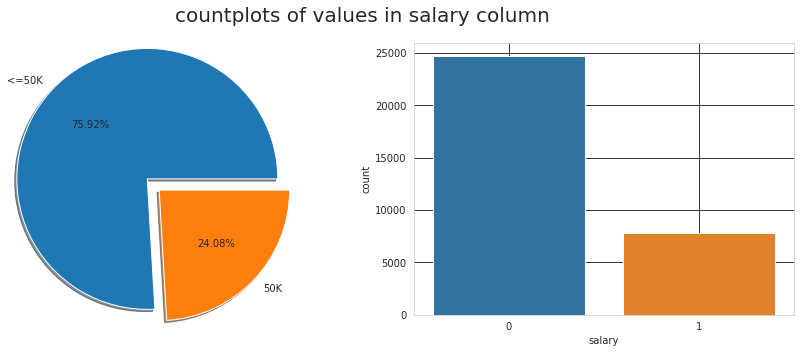

In [47]:
# Checking for imbalance in data
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
ax1 = axes[0]
ax2 = axes[1]
ax1.pie(df['salary'].value_counts(normalize=True), explode = [0, 0.15], autopct = '%1.2f%%', labels = ['<=50K', '50K'],\
        radius=1.2, shadow = True)
sns.set_style(style = 'dark')
sns.countplot('salary', data = df, ax = ax2)
fig.suptitle('countplots of values in salary column', fontsize = 20)
ax2.grid(True, color='black')
plt.show()

As we can observe from the graphs above, there is an imbalance in our dataset, where values having >50K in salary column being about 24% and values having <=50K in salary column being about 76% of total data respectively

In [48]:
df.head(2)

,age,capital_gain,capital_loss,country,education,education_rank,fnlwgt,hours_per_week,marital_status,occupation,race,relationship,salary,sex,workclass,gain/loss
0,40,0,0,United-States,Bachelors,13,289403,35,0,Adm-clerical,Black,Unmarried,0,1,Private,0
1,36,0,0,United-States,HS-grad,9,171968,40,1,Craft-repair,White,Husband,0,1,Private,0


## Outlier Treatment

In [49]:
df.columns

Index(['age', 'capital_gain', 'capital_loss', 'country', 'education',
       'education_rank', 'fnlwgt', 'hours_per_week', 'marital_status',
       'occupation', 'race', 'relationship', 'salary', 'sex', 'workclass',
       'gain/loss'],
      dtype='object')

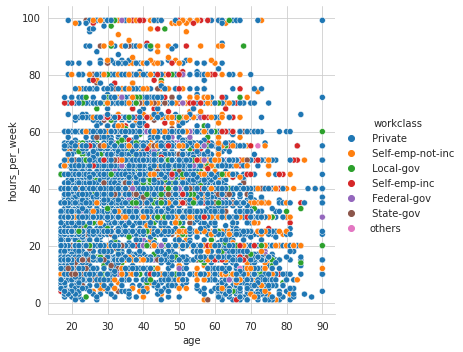

In [50]:
sns.set_style('whitegrid')
sns.relplot(x = 'age', y = 'hours_per_week', hue = 'workclass', data = df)
plt.show()

As we can see, in the above relplot, there are a lot of people working in private sector, local/state/federal governments having age as high as 90 which is not practically possible as at this age, people don't have the capability to do any work and moreover, they have reached far beyond their retirement age, so these are clear outliers in the dataset.

In [51]:
# Removing outliers from age column
age_mean = df['age'].mean()
age_std = df['age'].std()

upper_bound = age_mean + 3*age_std
lower_bound = age_mean - 3*age_std

df = df[(df['age'] <= upper_bound) & (df['age'] >= lower_bound)]

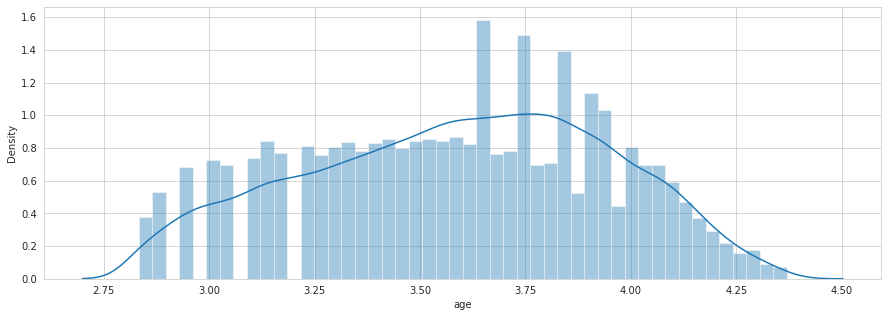

______________________________________________________________________
Skewness in age column after logarithmic transformation is : -0.15982139677512563


In [52]:
# Removing skewness from the age column by doing log transformation
df['age'] = np.log(df['age'])
plt.figure(figsize = (15,5))
sns.distplot(df['age'])
plt.show()
print('_'*70)
print('Skewness in age column after logarithmic transformation is :', df['age'].skew())

From here, we can see that skewness in our age column has been removed to a great extent and has become close to zero and resembling a gaussian distribution. Now we'll proceed with removing outliers from this data

## Feature Selection

In [53]:
# Dropping useless columns
df.drop(['workclass','fnlwgt','education','occupation','relationship','race','capital_gain','capital_loss','country'],\
       axis = 1, inplace = True)
df.head(3)

,age,education_rank,hours_per_week,marital_status,salary,sex,gain/loss
0,3.688879,13,35,0,0,1,0
1,3.583519,9,40,1,0,1,0
2,3.044522,9,35,0,0,0,0


In [54]:
# Renameing columns age as age_logarithmic 
df.rename(columns = {'age':'age_logarithmic'}, inplace = True)
df.head(3)

,age_logarithmic,education_rank,hours_per_week,marital_status,salary,sex,gain/loss
0,3.688879,13,35,0,0,1,0
1,3.583519,9,40,1,0,1,0
2,3.044522,9,35,0,0,0,0


In [55]:
df1 = df.copy()

In [56]:
### removing target feature salary from the dataframe df for now and storing it in another variable
salary = df1['salary'].reset_index(drop=True)
df1 = df1.drop(['salary'], axis=1)

## Building Machine Learning model 

In [57]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 31 kB/s 


In [58]:
# Importing different ML Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [59]:
# Creating a function to concatenate different one hot encoded dataframes
def concat_dataframes(data):
    dataframe = pd.concat([data, workclass.iloc[data.index, :],\
                           race.iloc[data.index , :],\
                           occupation.iloc[data.index, :],\
                           country.iloc[data.index, :]], axis = 1)
    
    dataframe = dataframe.dropna()
    dataframe = dataframe.reset_index(drop = True)
    return dataframe


In [60]:
concat_dataframes(df1)

,age_logarithmic,education_rank,hours_per_week,marital_status,sex,gain/loss,Local_gov,Private,Self_emp_inc,Self_emp_not_in_inc,State_gov,others,Asian_Pac_Islander,Black,Other,White,Armed_Forces,Craft_repair,Exec_managerial,Farming_fishing,Handlers_cleaners,Machine_op_inspct,Other_service,Priv_house_serv,Prof_specialty,Protective_serv,Sales,Tech_support,Transport_moving,El Salvador,Germany,India,Mexico,Philippines,Puerto Rico,United States,others
0,3.688879,13,35,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.583519,9,40,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.044522,9,35,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3.044522,8,48,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3.178054,10,53,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435,2.890372,7,35,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
32436,3.218876,10,50,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
32437,3.555348,9,35,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32438,3.761200,14,50,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
df1 = concat_dataframes(df1)

In [62]:
# using sklearn column transformer to standerdize the two continuous features we have in our data
features = ['age_logarithmic', 'hours_per_week']
scaler = ColumnTransformer(transformers = [
                                           ('scale_num_features', StandardScaler(), features)
], remainder='passthrough')

In [63]:
# comparing different classification models using sklearn pipeline
models = [LogisticRegression(), SVC(), AdaBoostClassifier(), RandomForestClassifier(), XGBClassifier(),\
          DecisionTreeClassifier(), KNeighborsClassifier(), CatBoostClassifier()]

model_labels = ['LogisticReg.','SVC','AdaBoost','RandomForest','Xgboost','DecisionTree','KNN', 'CatBoost']
mean_validation_f1_scores = []

for model in models:

  data_pipeline = Pipeline(steps = [
                                    ('scaler', scaler),
                                    ('resample', SMOTETomek()),
                                    ('model', model)
  ])
  mean_validation_f1 = cross_val_score(data_pipeline, df1, salary, cv=KFold(n_splits=10), scoring='f1',n_jobs=-1).mean()
  mean_validation_f1_scores.append(mean_validation_f1)

Setting n_splits in KFold cross validation as 10 in order to use 90 percent of data for training and 10 percent of data for testing in each validation.

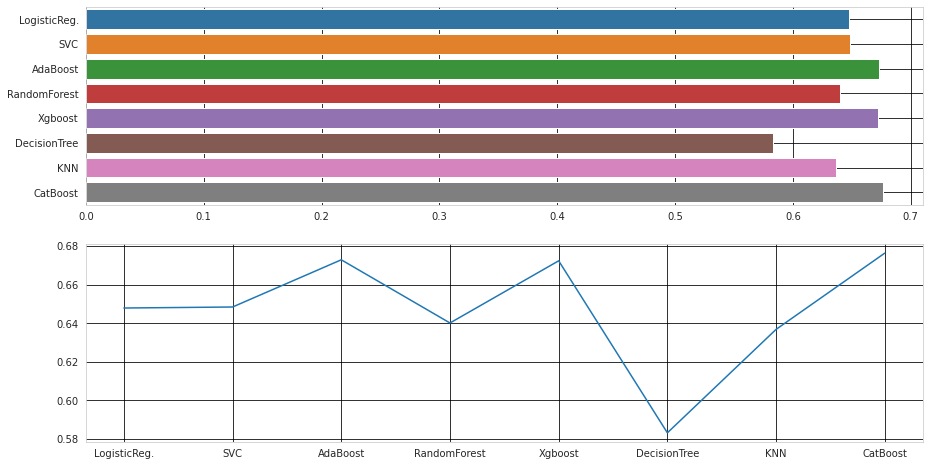

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))

sns.set_style('dark')
sns.barplot(y = model_labels ,x = mean_validation_f1_scores, ax=axes[0])
axes[0].grid(True, color='k')

sns.set_style('whitegrid')
sns.lineplot(x = model_labels, y = mean_validation_f1_scores)
axes[1].grid(True, color='k')
fig.show()

In [65]:
mean_validation_f1_scores

[0.6479362428888944,
 0.6484600835333807,
 0.6729303646517979,
 0.6401763944905081,
 0.6724034718922612,
 0.5832422584476741,
 0.6368577494720036,
 0.6763963968877748]

Performing hyperparameter optimization using GridSearchCV on the best performing model that is CatBoostClassifier

## Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
params = {
    'model__depth':[5,7,10,11,12,13],
    'model__learning_rate':[0.05,0.1,0.15,0.25,0.3],
    'model__iterations':[25, 30, 50, 80, 100,120]
}

In [68]:
data_pipeline = Pipeline(steps = [
                                  ('scaler', scaler),
                                  ('model', CatBoostClassifier(class_weights={0:1, 1:3.14}))
])

In [69]:
grid_search=GridSearchCV(data_pipeline,param_grid=params,scoring='f1',n_jobs=-1,cv=KFold(n_splits=3))

In [70]:
grid_search.fit(df1, salary)

0:	learn: 0.5428338	total: 88.6ms	remaining: 2.57s
1:	learn: 0.4844850	total: 124ms	remaining: 1.74s
2:	learn: 0.4443988	total: 160ms	remaining: 1.44s
3:	learn: 0.4207481	total: 197ms	remaining: 1.28s
4:	learn: 0.4073921	total: 234ms	remaining: 1.17s
5:	learn: 0.3993304	total: 268ms	remaining: 1.07s
6:	learn: 0.3925387	total: 308ms	remaining: 1.01s
7:	learn: 0.3862630	total: 345ms	remaining: 949ms
8:	learn: 0.3823916	total: 382ms	remaining: 891ms
9:	learn: 0.3788729	total: 418ms	remaining: 837ms
10:	learn: 0.3770447	total: 453ms	remaining: 783ms
11:	learn: 0.3751031	total: 489ms	remaining: 734ms
12:	learn: 0.3728133	total: 529ms	remaining: 691ms
13:	learn: 0.3703273	total: 568ms	remaining: 649ms
14:	learn: 0.3682848	total: 605ms	remaining: 605ms
15:	learn: 0.3658929	total: 644ms	remaining: 563ms
16:	learn: 0.3646794	total: 679ms	remaining: 519ms
17:	learn: 0.3625525	total: 721ms	remaining: 481ms
18:	learn: 0.3604296	total: 768ms	remaining: 444ms
19:	learn: 0.3600270	total: 787ms	remain

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scale_num_features',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['age_logarit

In [71]:
grid_search.best_score_

0.6774273319634917

In [72]:
grid_search.best_params_

{'model__depth': 10, 'model__iterations': 30, 'model__learning_rate': 0.25}

In [73]:
# Creating pipeline with new parameters after optained from gridsearchcv
data_pipeline = Pipeline(steps = [
                                  ('scaler', scaler),
                                  ('resample', SMOTETomek()),
                                  ('model', CatBoostClassifier(depth=10,\
                                                               iterations=30, learning_rate=0.25))
])

In [74]:
f1_scores = cross_val_score(data_pipeline, df1, salary, scoring='f1', cv=KFold(n_splits=10), n_jobs=-1)
print('max f1 :', f1_scores.max())
print('min f1 :', f1_scores.min())
print('mean f1 :', f1_scores.mean())

max f1 : 0.6979280261723011
min f1 : 0.6614349775784754
mean f1 : 0.6796593220671376


In [75]:
accuracy_scores = cross_val_score(data_pipeline, df1, salary, scoring='accuracy', cv=KFold(n_splits=10), n_jobs=-1)
print('max accuracy :', accuracy_scores.max())
print('min accuracy :', accuracy_scores.min())
print('mean accuracy :', accuracy_scores.mean())

max accuracy : 0.8332305795314426
min accuracy : 0.8017879161528977
mean accuracy : 0.8194512946979039


Here, as we can see the maximum, minimum and mean F1 and accuracy scores are pretty much good so we'll continue with the model

## Robust Model Testing

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, salary, test_size = 0.1, random_state = 0)

In [77]:
data_pipeline.fit(x_train, y_train)
y_pred = data_pipeline.predict(x_test)

0:	learn: 0.5142049	total: 134ms	remaining: 3.88s
1:	learn: 0.4318439	total: 251ms	remaining: 3.51s
2:	learn: 0.3931485	total: 375ms	remaining: 3.37s
3:	learn: 0.3728688	total: 485ms	remaining: 3.15s
4:	learn: 0.3585533	total: 608ms	remaining: 3.04s
5:	learn: 0.3474175	total: 721ms	remaining: 2.88s
6:	learn: 0.3383276	total: 836ms	remaining: 2.75s
7:	learn: 0.3308784	total: 953ms	remaining: 2.62s
8:	learn: 0.3247843	total: 1.06s	remaining: 2.48s
9:	learn: 0.3191407	total: 1.18s	remaining: 2.37s
10:	learn: 0.3148228	total: 1.3s	remaining: 2.25s
11:	learn: 0.3107050	total: 1.43s	remaining: 2.14s
12:	learn: 0.3084520	total: 1.55s	remaining: 2.03s
13:	learn: 0.3060459	total: 1.67s	remaining: 1.91s
14:	learn: 0.3026846	total: 1.79s	remaining: 1.79s
15:	learn: 0.3006056	total: 1.9s	remaining: 1.67s
16:	learn: 0.2980138	total: 2.02s	remaining: 1.55s
17:	learn: 0.2956347	total: 2.15s	remaining: 1.43s
18:	learn: 0.2937790	total: 2.27s	remaining: 1.31s
19:	learn: 0.2910954	total: 2.39s	remaining

In [78]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

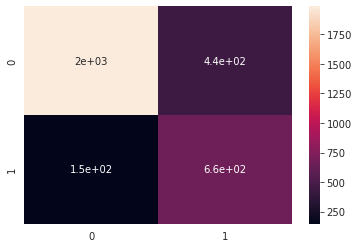

In [79]:
sns.heatmap(confusion_matrix(y_pred=y_pred, y_true=y_test),annot=True)

In [80]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test))

,0,1
0,1988,445
1,146,665


In [81]:
print('recall :', recall_score(y_test, y_pred))
print('precision :', precision_score(y_test, y_pred))
print('F1 :', f1_score(y_test, y_pred))
print('accuracy :', accuracy_score(y_test, y_pred))

recall : 0.8199753390875463
precision : 0.5990990990990991
F1 : 0.6923477355543988
accuracy : 0.8178175092478421


So, as we can see we are getting some good with our CatBoost model after hyperparameter tuning using GridSearchCV. Now, using this model in production